# Data Analysis for Used_Car Project

This repository demonstartes some common exploratory data analysis methods and techniques using python.
The dataset has been taken from csv file shared in the same folder the aim is to get all insights and build Linear regression machine learning model with Accuracy r2 score must be more than 75%.

## DataSet Overview

-  All data come from one source which was csv file shared and contains details in columns as following.
    - index:              just index
    - Name:               The brand and model of the car.
    - Location:           The location in which the car is being sold or is available for purchase.
    - Year:               The year or edition of the model.
    - Kilometers_Driven:  The total kilometres driven in the car by the previous owner(s) in KM.
    - Fuel_Type:          The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)
    - Transmission:       The type of transmission used by the car. (Automatic / Manual)
    - Owner_Type:         Whether the ownership is Firsthand, Second hand or other.
    - Engine:             The displacement volume of the engine in cc.
    - Power:              The maximum power of the engine in bhp.
    - Seats:              The number of seats in the car.
    - New_Price:          The price of a new car of the same model.
    - Price:              The price of the used car in INR Lakhs (Indian Rupee).

## Project Tasks

We will go through 13 tasks to implement our project:

Task 1: Definining Exploratory Data Analysis with an overview of the whole project .

Task 2: Importing libraries and Exploring the Dataset.

Task 3: Remove dublicated and not used information from Dataset

Task 4: Handle the NaN values in Dataset

Task 5: adjust data type for attributes has wrong data type to improve analysis.

Task 6: Create Brand column and check if there is strong releation with Price and data are distrbuted good in this dataset.

Task 4: Deal with wrong data before visualize it.

Task 5: Creating visual methods to analyze the data.

Task 6: Investigate outliers in each column to decide how we will deal with

Task 7: Check Fuel_Type data

Task 8: Check Transmission data

Task 9: Check Location column data

Task 10: Check Year column data

Task 11: Check Owner_Type data

Task 12: Check Seats data

Task 13: Handel Feature Fuel_Type before included it in Model

Task 14: Handel Feature Owner_Type before included it in Model

Task 15: Handel Feature Year before included it in Model

Task 16: Convert non numerical data to numerical one

Task 17: Copy dataset and concatenate with dummy data

Task18: Check for outliers and see how and handel it 

Task19: Define the features will be used and save it to X 

Taksk20: After define X and y split data to tain and test

Task21: Train model linear regression with train data 

Task22: Test the module and get the result using r2


## Summary and conclusion result

- the result is r2_score: 0.75185683194152 it is as per requested after adjust outliers from the data and add Brand group to model.

## Task 2: Importing libraries and Exploring the Dataset.

In [418]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, csv file I/O 
import seaborn as sns # Data Visualization
sns.set() # Set seaborn plot style as defualt 
from matplotlib import pyplot as plt # Data Visualization
from datetime import datetime  # Datetime converter function
import scipy.stats as stats   #Statistics calculation
from sklearn.preprocessing import LabelEncoder #Convert categorical data to numerical data

In [419]:
# Reading csv file into raw dataframe 
dataset= pd.read_csv('used cars regression.csv')

In [420]:
# Display Frist 5 rows from dataframe
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [421]:
# Display Frist 5 rows from dataframe
dataset.tail(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [422]:
# Display all column inside the dataframe
list(dataset)

['Unnamed: 0',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [423]:
# Information about data shape and types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Analysis output:

    Data have 13 attributes and 6019 instance. 2 float type, 2 integer type and 9 object(string) type.
    Some attributes types not matching their information need to be adjusted.
    
    There are two indexing and need to remove dublicated one.
    
    Missing values need to check deeper.

## Task 3: Remove dublicated and not used information from Dataset

In [424]:
#Drop the dublicated index column
dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

In [425]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [426]:
# Remove Column New_Price as there are no enough data and not our main focuse here
dataset.drop(dataset.columns[[11]], axis=1, inplace=True)

In [427]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


## Task 4: Handle the NaN values in Dataset

In [428]:
# Check for the null values 

dataset.isna().apply(pd.value_counts)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
False,6019.0,6019.0,6019.0,6019.0,6019.0,6019.0,6019.0,6017,5983,5983,5977,6019.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,36,36,42,NaN


In [429]:
# Check the dataset after drop all records with NaN valuse how it will look like 
dataset.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


Analysis output:

    The amount of records with NaN values is not big so I will drop them the data records will be 5975 from 6019.

In [430]:
# Drop all records with NaN valuse
dataset.dropna(inplace = True)

## Task 5: adjust data type for attributes has wrong data type to improve analysis.

- Adjust type for columns Mileage, Engine, Power and Seats


In [431]:
# Seats column change from float to int
dataset['Seats'] = dataset['Seats'].astype(int) 

In [432]:
# Remove letters from Columns Mileage, Engine and Power
def remove_letters(record):
  
    #x= record.split(' ')[0]
    #print (x)
    #return
    return record.split(' ')[0]
#for test    
remove_letters('14.0 kmpl')


'14.0'

In [433]:
#Remove Measure letter from Mileage Column
dataset['Mileage'] = dataset['Mileage'].apply(lambda x: remove_letters(x))

In [434]:
#Remove Measure letter from Engine Column
dataset['Engine'] = dataset['Engine'].apply(lambda x: remove_letters(x))

In [435]:
#Remove Measure letter from Engine Column
dataset['Power'] = dataset['Power'].apply(lambda x: remove_letters(x))

In [436]:
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74


In [437]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   int32  
 11  Price              5975 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 583.5+ KB


In [438]:
# Mileage column change from String to float
dataset['Mileage'] = dataset['Mileage'].astype(float) 

In [439]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   int32  
 11  Price              5975 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 583.5+ KB


In [440]:
# Engine column change from String to int
dataset['Engine'] = dataset['Engine'].astype(int) 

In [441]:
# Power column change from String to float
dataset['Power'] = dataset['Power'].astype(float) 

ValueError: could not convert string to float: 'null'

In [442]:
dataset[dataset.Power == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,null,5,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086,null,5,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,null,5,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,null,5,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,null,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.00,1086,null,5,1.85
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086,null,5,1.20
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798,null,5,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112,null,6,1.70


In [443]:
dataset= dataset[dataset.Power != 'null']

In [444]:
# Power column change from String to float
dataset['Power'] = dataset['Power'].astype(float) 

In [445]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int32  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 550.5+ KB


In [446]:
#Add new feature as column called Brand from Name Column
dataset['Brand'] = dataset['Name'].apply(lambda x: remove_letters(x))

In [447]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int32  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(6)
memory usage: 596.4+ KB


In [448]:
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi


In [449]:
dataset['Brand'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Isuzu               1
Bentley             1
Ambassador          1
Name: Brand, dtype: int64

In [450]:
dataset['Brand'].value_counts()>50:

SyntaxError: invalid syntax (<ipython-input-450-5b7cc0e55e6f>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


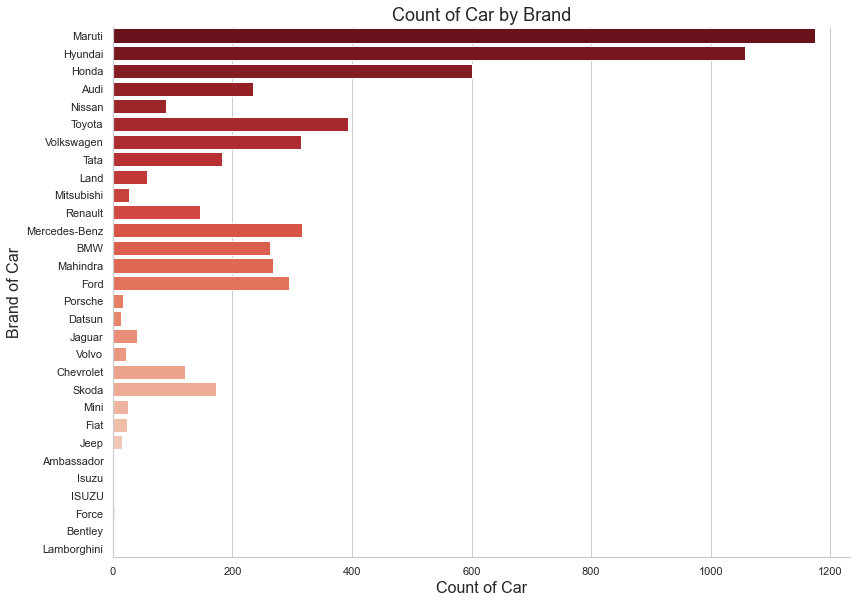

In [451]:

# Count plot to show the number of cars belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y="Brand", data=dataset, kind="count",
                   palette="Reds_r", size=8, aspect=1.5)
g.ax.set_title("Count of Car by Brand",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Car",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Brand of Car",fontdict= {'size':16})
plt.show()

Analysis output:

    There are a lot of brands where we have very few data and need more data for these brands to improve the model
    
    If it will be include in our model need more data or filtered and focuse only on the brand we have data

In [452]:
# As car distrbuted with many brand you can Group them to 3 categories depend on price
group_df = dataset.groupby(by = 'Brand').mean()['Price'].sort_values().reset_index()


In [453]:
group_df

,Brand,Price
0,Ambassador,1.350000
1,Datsun,3.049231
2,Chevrolet,3.057333
3,Fiat,3.570435
4,Tata,3.605574
5,Maruti,4.554868
6,Nissan,4.784719
7,Volkswagen,5.306815
8,Honda,5.424167
9,Hyundai,5.513715


In [454]:
def Group_car(x):
    if x in [ 'Lamborghini', 'Bentley', 'Porsche', 'Land','Jaguar',  'Mercedes-Benz',  'Mini',
       'Audi', 'BMW']:
        return 'HIGH_Class'    
    elif x in ['Ford',
            'Skoda',
         'Mahindra',
            'Force',
       'Mitsubishi',
           'Toyota',
            'ISUZU',
             'Jeep',
           'Volvo',
          'Isuzu']:
        return 'MIDDLE_Class'
    else:
        return 'LOW_Class'

In [455]:
dataset['Car_Class'] = dataset['Brand']

In [456]:
dataset['Car_Class'] = dataset['Car_Class'].apply(Group_car)

In [457]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Class
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti,LOW_Class
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,LOW_Class
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,LOW_Class
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,LOW_Class
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,HIGH_Class


## Task 7: Check Fuel_Type data

In [458]:
dataset['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

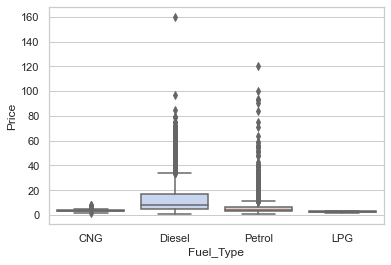

In [459]:
sns.boxplot(x="Fuel_Type", y="Price",data=dataset, palette="coolwarm")

Analysis output:

    There are  very few data for CBG and LPG Fuel_Type and need more data for these two types to improve the model

## Task 8: Check Transmission data

In [460]:
dataset['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

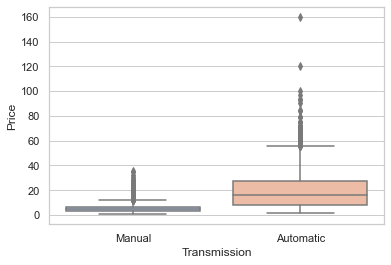

In [461]:
sns.boxplot(x="Transmission", y="Price",data=dataset, palette="coolwarm")

Analysis output:

    data capture are good for both type of Transmission
    
    It is clear in this data set Automatic Used car are higher than Manual car

## Task 9: Check Location column data

In [462]:
dataset['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

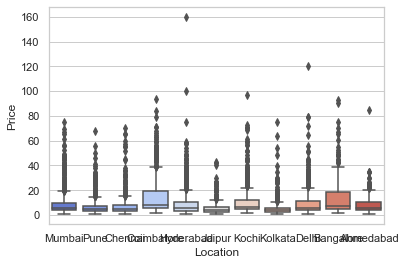

In [463]:
sns.boxplot(x="Location", y="Price",data=dataset, palette="coolwarm")

Analysis output:

    data capture are well distrbuted for differnet location
    
    In this data set the location has no big affect on the price so we can take it out from model

## Task 10: Check Year column data

In [464]:
dataset['Year'].value_counts()

2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Year, dtype: int64

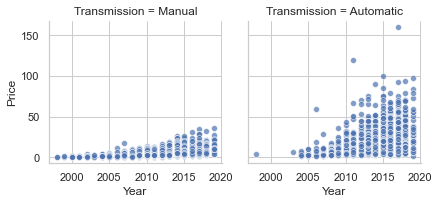

In [465]:
g = sns.FacetGrid(dataset, col="Transmission",  palette="cubehelix")
g.map(sns.scatterplot, "Year", "Price", alpha=.7)
g.add_legend()

Analysis output:

    data capture are focuse on Cars model after 2005 and need more data for older than this year to improve the model
    
    There is liner regerssion affect between Model Year and Price even by fixed the factor of Transmission_Type

## Task 11: Check Owner_Type data

In [466]:
dataset['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

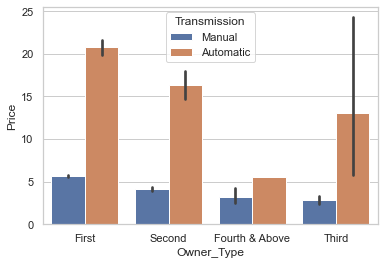

In [467]:
sns.barplot('Owner_Type','Price',hue='Transmission',data=dataset)

Analysis output:

    There are very few data for Owner_Type Fourth & Above and in case it will be added to model need more data
    
    Independ on Owner type always Automatic used car price are much higher than Manual Oldcar price

## Task 12: Check Seats data

In [468]:
dataset['Seats'].value_counts()

5     4919
7      672
8      133
4       99
6       29
2       13
10       4
9        3
Name: Seats, dtype: int64

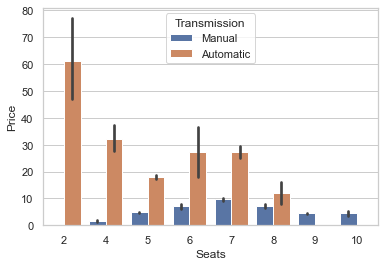

In [469]:
sns.barplot('Seats','Price',hue='Transmission',data=dataset)

Analysis output:

    There are very few data for most grops of seats (9,10,2,6,4) need to get more data about them to improve model
    
    For Major two types in this dataset (5,7),  the price has big impact by seat number 
    eventhough I will not take it in the model untill collect more data

## Task 13: Handel Feature Fuel_Type before included it in Model

In [470]:
def Fuel_Type(type):
    # Take the the fuel type
    fuel = type
    # Compare the age, otherwise leave the sex
    if fuel == 'Diesel' or fuel == 'Petrol' :
        return fuel
    else:
        return 'Null'

In [471]:
#Remove Measure letter from Mileage Column
dataset['Fuel_Type'] = dataset['Fuel_Type'].apply(lambda x: Fuel_Type(x))

In [472]:
dataset= dataset[dataset['Fuel_Type']!='Null']

In [473]:
dataset['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
Name: Fuel_Type, dtype: int64

## Task 14: Handel Feature Owner_Type before included it in Model

In [474]:
#Filter dataset and only take First, Second and Third Ownter_Type

dataset= dataset[dataset['Owner_Type'] != 'Fourth & Above']


In [475]:
dataset['Owner_Type'].value_counts()

First     4786
Second     913
Third      101
Name: Owner_Type, dtype: int64

## Task 15: Handel Feature Year before included it in Model

In [476]:
#Filter dataset and only take Year above or equal 2005

dataset= dataset[dataset['Year'] >= 2005]


In [477]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5737 non-null   object 
 1   Location           5737 non-null   object 
 2   Year               5737 non-null   int64  
 3   Kilometers_Driven  5737 non-null   int64  
 4   Fuel_Type          5737 non-null   object 
 5   Transmission       5737 non-null   object 
 6   Owner_Type         5737 non-null   object 
 7   Mileage            5737 non-null   float64
 8   Engine             5737 non-null   int32  
 9   Power              5737 non-null   float64
 10  Seats              5737 non-null   int32  
 11  Price              5737 non-null   float64
 12  Brand              5737 non-null   object 
 13  Car_Class          5737 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 627.5+ KB


# Task 16: Convert non numerical data to numerical one

In [478]:
# Convert Manual and Automatic to 0 and 1
# Encoding categorical data
dummy_Trans=pd.get_dummies(dataset['Transmission'])
dummy_Trans.head()


,Automatic,Manual
1,0,1
2,0,1
3,0,1
4,1,0
6,0,1


In [479]:
dummy_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Automatic  5737 non-null   uint8
 1   Manual     5737 non-null   uint8
dtypes: uint8(2)
memory usage: 56.0 KB


In [480]:
# Convert Owner_type to 0 and 1
# Encoding categorical data
dummy_Owner=pd.get_dummies(dataset['Owner_Type'])
dummy_Owner.head()


,First,Second,Third
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
6,1,0,0


In [481]:
dummy_Owner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   First   5737 non-null   uint8
 1   Second  5737 non-null   uint8
 2   Third   5737 non-null   uint8
dtypes: uint8(3)
memory usage: 61.6 KB


In [482]:
# Convert Fuel_type to 0 and 1
# Encoding categorical data
dummy_Fuel=pd.get_dummies(dataset['Fuel_Type'])
dummy_Fuel.head()

,Diesel,Petrol
1,1,0
2,0,1
3,1,0
4,1,0
6,1,0


In [483]:
dummy_Fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Diesel  5737 non-null   uint8
 1   Petrol  5737 non-null   uint8
dtypes: uint8(2)
memory usage: 56.0 KB


In [484]:
# Convert Fuel_type to 0 and 1
# Encoding categorical data
dummy_Brand=pd.get_dummies(dataset['Car_Class'])
dummy_Brand.head()

,HIGH_Class,LOW_Class,MIDDLE_Class
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
6,0,1,0


In [486]:
dummy_Brand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HIGH_Class    5737 non-null   uint8
 1   LOW_Class     5737 non-null   uint8
 2   MIDDLE_Class  5737 non-null   uint8
dtypes: uint8(3)
memory usage: 61.6 KB


In [487]:
# Convert Manual and Automatic to 0 and 1
# Encoding categorical data
dummy_Year=pd.get_dummies(dataset['Year'])
dummy_Year.head()


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [488]:
dummy_Year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2005    5737 non-null   uint8
 1   2006    5737 non-null   uint8
 2   2007    5737 non-null   uint8
 3   2008    5737 non-null   uint8
 4   2009    5737 non-null   uint8
 5   2010    5737 non-null   uint8
 6   2011    5737 non-null   uint8
 7   2012    5737 non-null   uint8
 8   2013    5737 non-null   uint8
 9   2014    5737 non-null   uint8
 10  2015    5737 non-null   uint8
 11  2016    5737 non-null   uint8
 12  2017    5737 non-null   uint8
 13  2018    5737 non-null   uint8
 14  2019    5737 non-null   uint8
dtypes: uint8(15)
memory usage: 128.9 KB


In [489]:
#Copy dataset and concatenate with dummy data
dataset1= dataset.copy()

In [490]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5737 non-null   object 
 1   Location           5737 non-null   object 
 2   Year               5737 non-null   int64  
 3   Kilometers_Driven  5737 non-null   int64  
 4   Fuel_Type          5737 non-null   object 
 5   Transmission       5737 non-null   object 
 6   Owner_Type         5737 non-null   object 
 7   Mileage            5737 non-null   float64
 8   Engine             5737 non-null   int32  
 9   Power              5737 non-null   float64
 10  Seats              5737 non-null   int32  
 11  Price              5737 non-null   float64
 12  Brand              5737 non-null   object 
 13  Car_Class          5737 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 627.5+ KB


In [491]:
dataset1=pd.concat([dataset1,dummy_Trans],axis=1)
dataset1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Class,Automatic,Manual
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,LOW_Class,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,LOW_Class,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,LOW_Class,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,HIGH_Class,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5,3.50,Nissan,LOW_Class,0,1


In [492]:
dataset1=pd.concat([dataset1,dummy_Owner],axis=1)
dataset1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Class,Automatic,Manual,First,Second,Third
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,LOW_Class,0,1,1,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,LOW_Class,0,1,1,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,LOW_Class,0,1,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,HIGH_Class,1,0,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5,3.50,Nissan,LOW_Class,0,1,1,0,0


In [493]:
dataset1=pd.concat([dataset1,dummy_Fuel],axis=1)
dataset1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Price,Brand,Car_Class,Automatic,Manual,First,Second,Third,Diesel,Petrol
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,...,12.50,Hyundai,LOW_Class,0,1,1,0,0,1,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,...,4.50,Honda,LOW_Class,0,1,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,...,6.00,Maruti,LOW_Class,0,1,1,0,0,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,...,17.74,Audi,HIGH_Class,1,0,0,1,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,...,3.50,Nissan,LOW_Class,0,1,1,0,0,1,0


In [494]:
dataset1=pd.concat([dataset1,dummy_Brand],axis=1)
dataset1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Automatic,Manual,First,Second,Third,Diesel,Petrol,HIGH_Class,LOW_Class,MIDDLE_Class
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,...,0,1,1,0,0,1,0,0,1,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,...,0,1,1,0,0,0,1,0,1,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,...,0,1,1,0,0,1,0,0,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,...,1,0,0,1,0,1,0,1,0,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,...,0,1,1,0,0,1,0,0,1,0


In [495]:
dataset1=pd.concat([dataset1,dummy_Year],axis=1)
dataset1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,...,0,0,0,0,0,1,0,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,...,0,0,1,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,...,0,0,0,1,0,0,0,0,0,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,...,0,0,0,1,0,0,0,0,0,0


In [496]:
list(dataset1)

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Brand',
 'Car_Class',
 'Automatic',
 'Manual',
 'First',
 'Second',
 'Third',
 'Diesel',
 'Petrol',
 'HIGH_Class',
 'LOW_Class',
 'MIDDLE_Class',
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [497]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 1 to 6018
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5737 non-null   object 
 1   Location           5737 non-null   object 
 2   Year               5737 non-null   int64  
 3   Kilometers_Driven  5737 non-null   int64  
 4   Fuel_Type          5737 non-null   object 
 5   Transmission       5737 non-null   object 
 6   Owner_Type         5737 non-null   object 
 7   Mileage            5737 non-null   float64
 8   Engine             5737 non-null   int32  
 9   Power              5737 non-null   float64
 10  Seats              5737 non-null   int32  
 11  Price              5737 non-null   float64
 12  Brand              5737 non-null   object 
 13  Car_Class          5737 non-null   object 
 14  Automatic          5737 non-null   uint8  
 15  Manual             5737 non-null   uint8  
 16  First              5737 

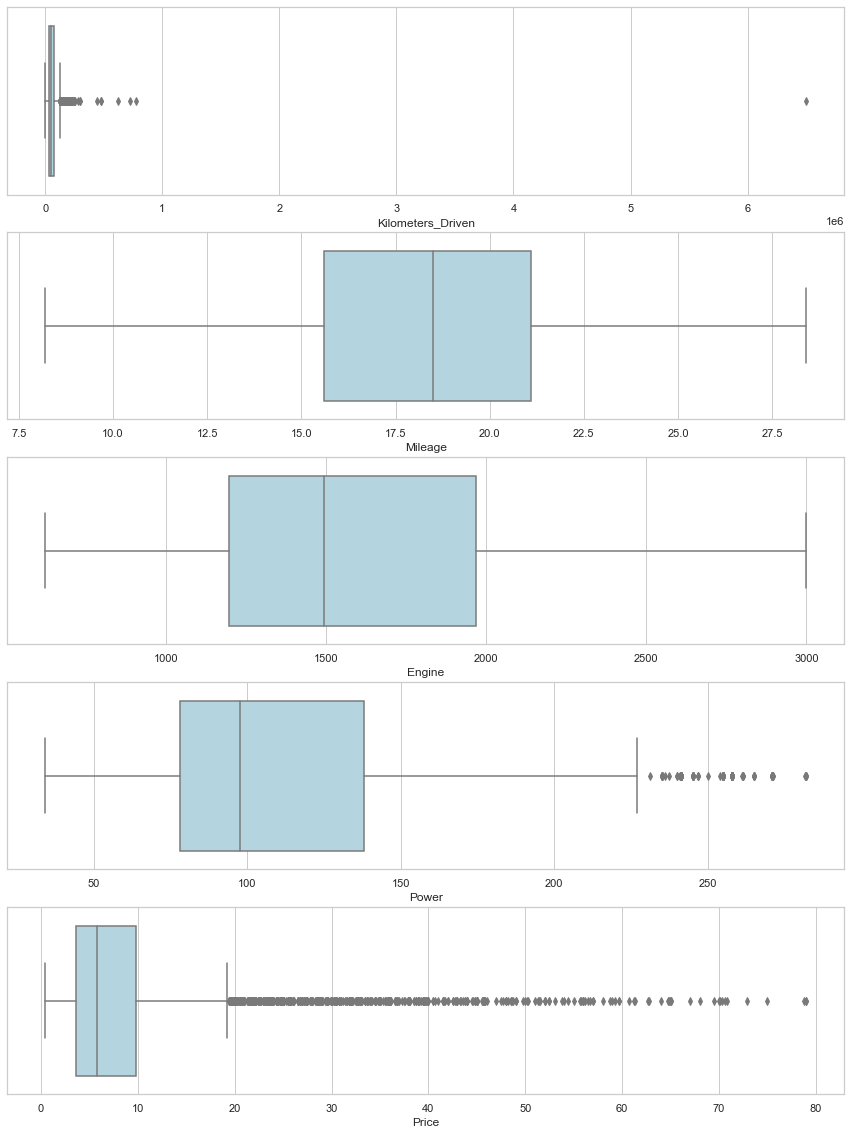

In [515]:
# checking for outliers after modified has been done
plt.figure(figsize = (15,20))
plt.subplot(5,1,1)
sns.boxplot(x= dataset1.Kilometers_Driven, color = 'lightblue')
plt.subplot(5,1,2)
sns.boxplot(x= dataset1.Mileage, color = 'lightblue')
plt.subplot(5,1,3)
sns.boxplot(x= dataset1.Engine, color = 'lightblue')
plt.subplot(5,1,4)
sns.boxplot(x= dataset1.Power, color = 'lightblue')
plt.subplot(5,1,5)
sns.boxplot(x= dataset1.Price, color = 'lightblue')


plt.show()

In [569]:
dataset1=dataset1[dataset1.Kilometers_Driven <=100000.0]

In [570]:
dataset1=dataset1[dataset1.Mileage != 0]

In [571]:
dataset1=dataset1[dataset1.Engine <= 3000.0]

In [572]:
dataset1=dataset1[dataset1.Power < 250.0]

In [573]:
dataset1=dataset1[dataset1.Price <= 60.0]

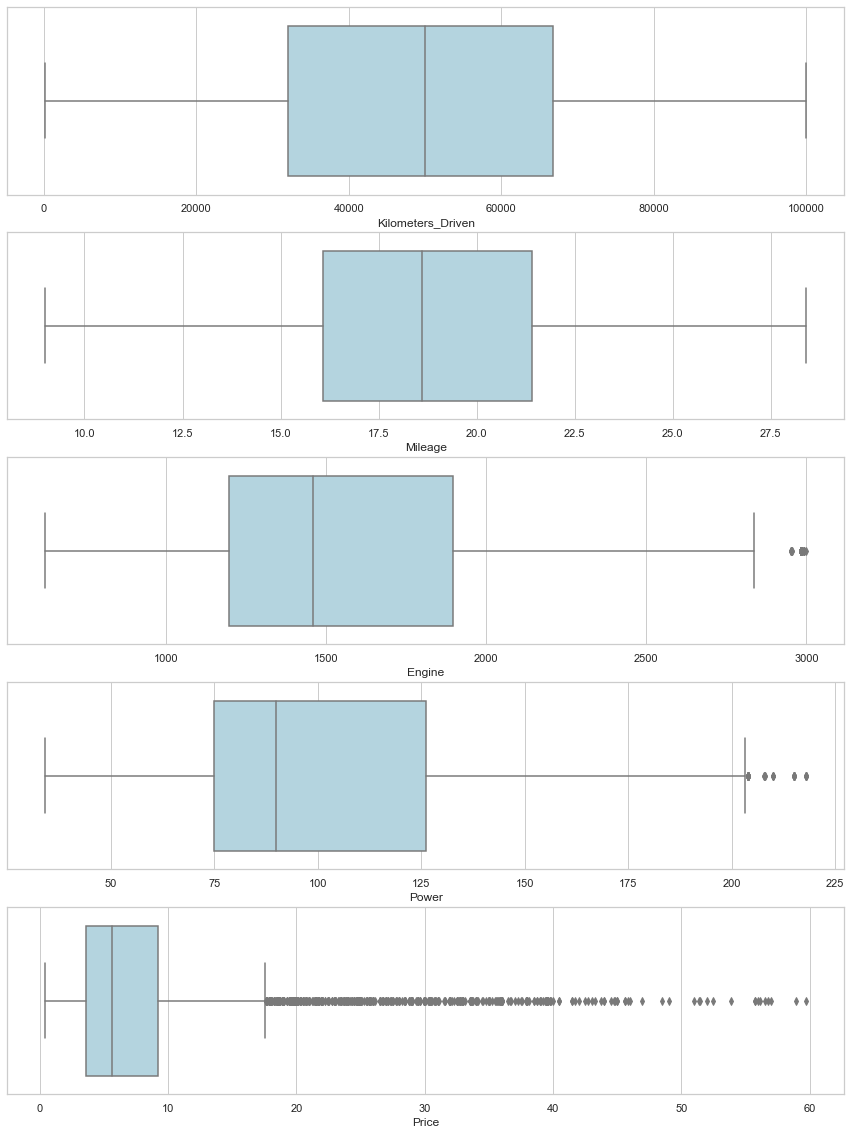

In [574]:
# checking for outliers after modified has been done
plt.figure(figsize = (15,20))
plt.subplot(5,1,1)
sns.boxplot(x= dataset1.Kilometers_Driven, color = 'lightblue')
plt.subplot(5,1,2)
sns.boxplot(x= dataset1.Mileage, color = 'lightblue')
plt.subplot(5,1,3)
sns.boxplot(x= dataset1.Engine, color = 'lightblue')
plt.subplot(5,1,4)
sns.boxplot(x= dataset1.Power, color = 'lightblue')
plt.subplot(5,1,5)
sns.boxplot(x= dataset1.Price, color = 'lightblue')


plt.show()

In [575]:
#brief of the data summary
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5002.0,2013.835066,2.844814,2005.00,2012.00,2014.00,2016.000,2019.00
Kilometers_Driven,5002.0,49701.014594,23189.525035,171.00,32000.00,50000.00,66792.500,100000.00
Mileage,5002.0,18.742153,3.919821,9.00,16.07,18.60,21.400,28.40
Engine,5002.0,1527.976010,468.959946,624.00,1197.00,1461.00,1896.000,2999.00
Power,5002.0,105.971849,39.902666,34.20,75.00,89.84,126.285,218.00
Seats,5002.0,5.236106,0.714374,2.00,5.00,5.00,5.000,10.00
Price,5002.0,8.387807,8.058048,0.44,3.60,5.65,9.200,59.72
Automatic,5002.0,0.268293,0.443115,0.00,0.00,0.00,1.000,1.00
Manual,5002.0,0.731707,0.443115,0.00,0.00,1.00,1.000,1.00
First,5002.0,0.847061,0.359965,0.00,1.00,1.00,1.000,1.00


In [530]:
df_test = dataset1[['Mileage', 'Engine', 'Power','Automatic', 'Manual','First', 'Second', 'Third', 'Diesel', 'Petrol','Price']]

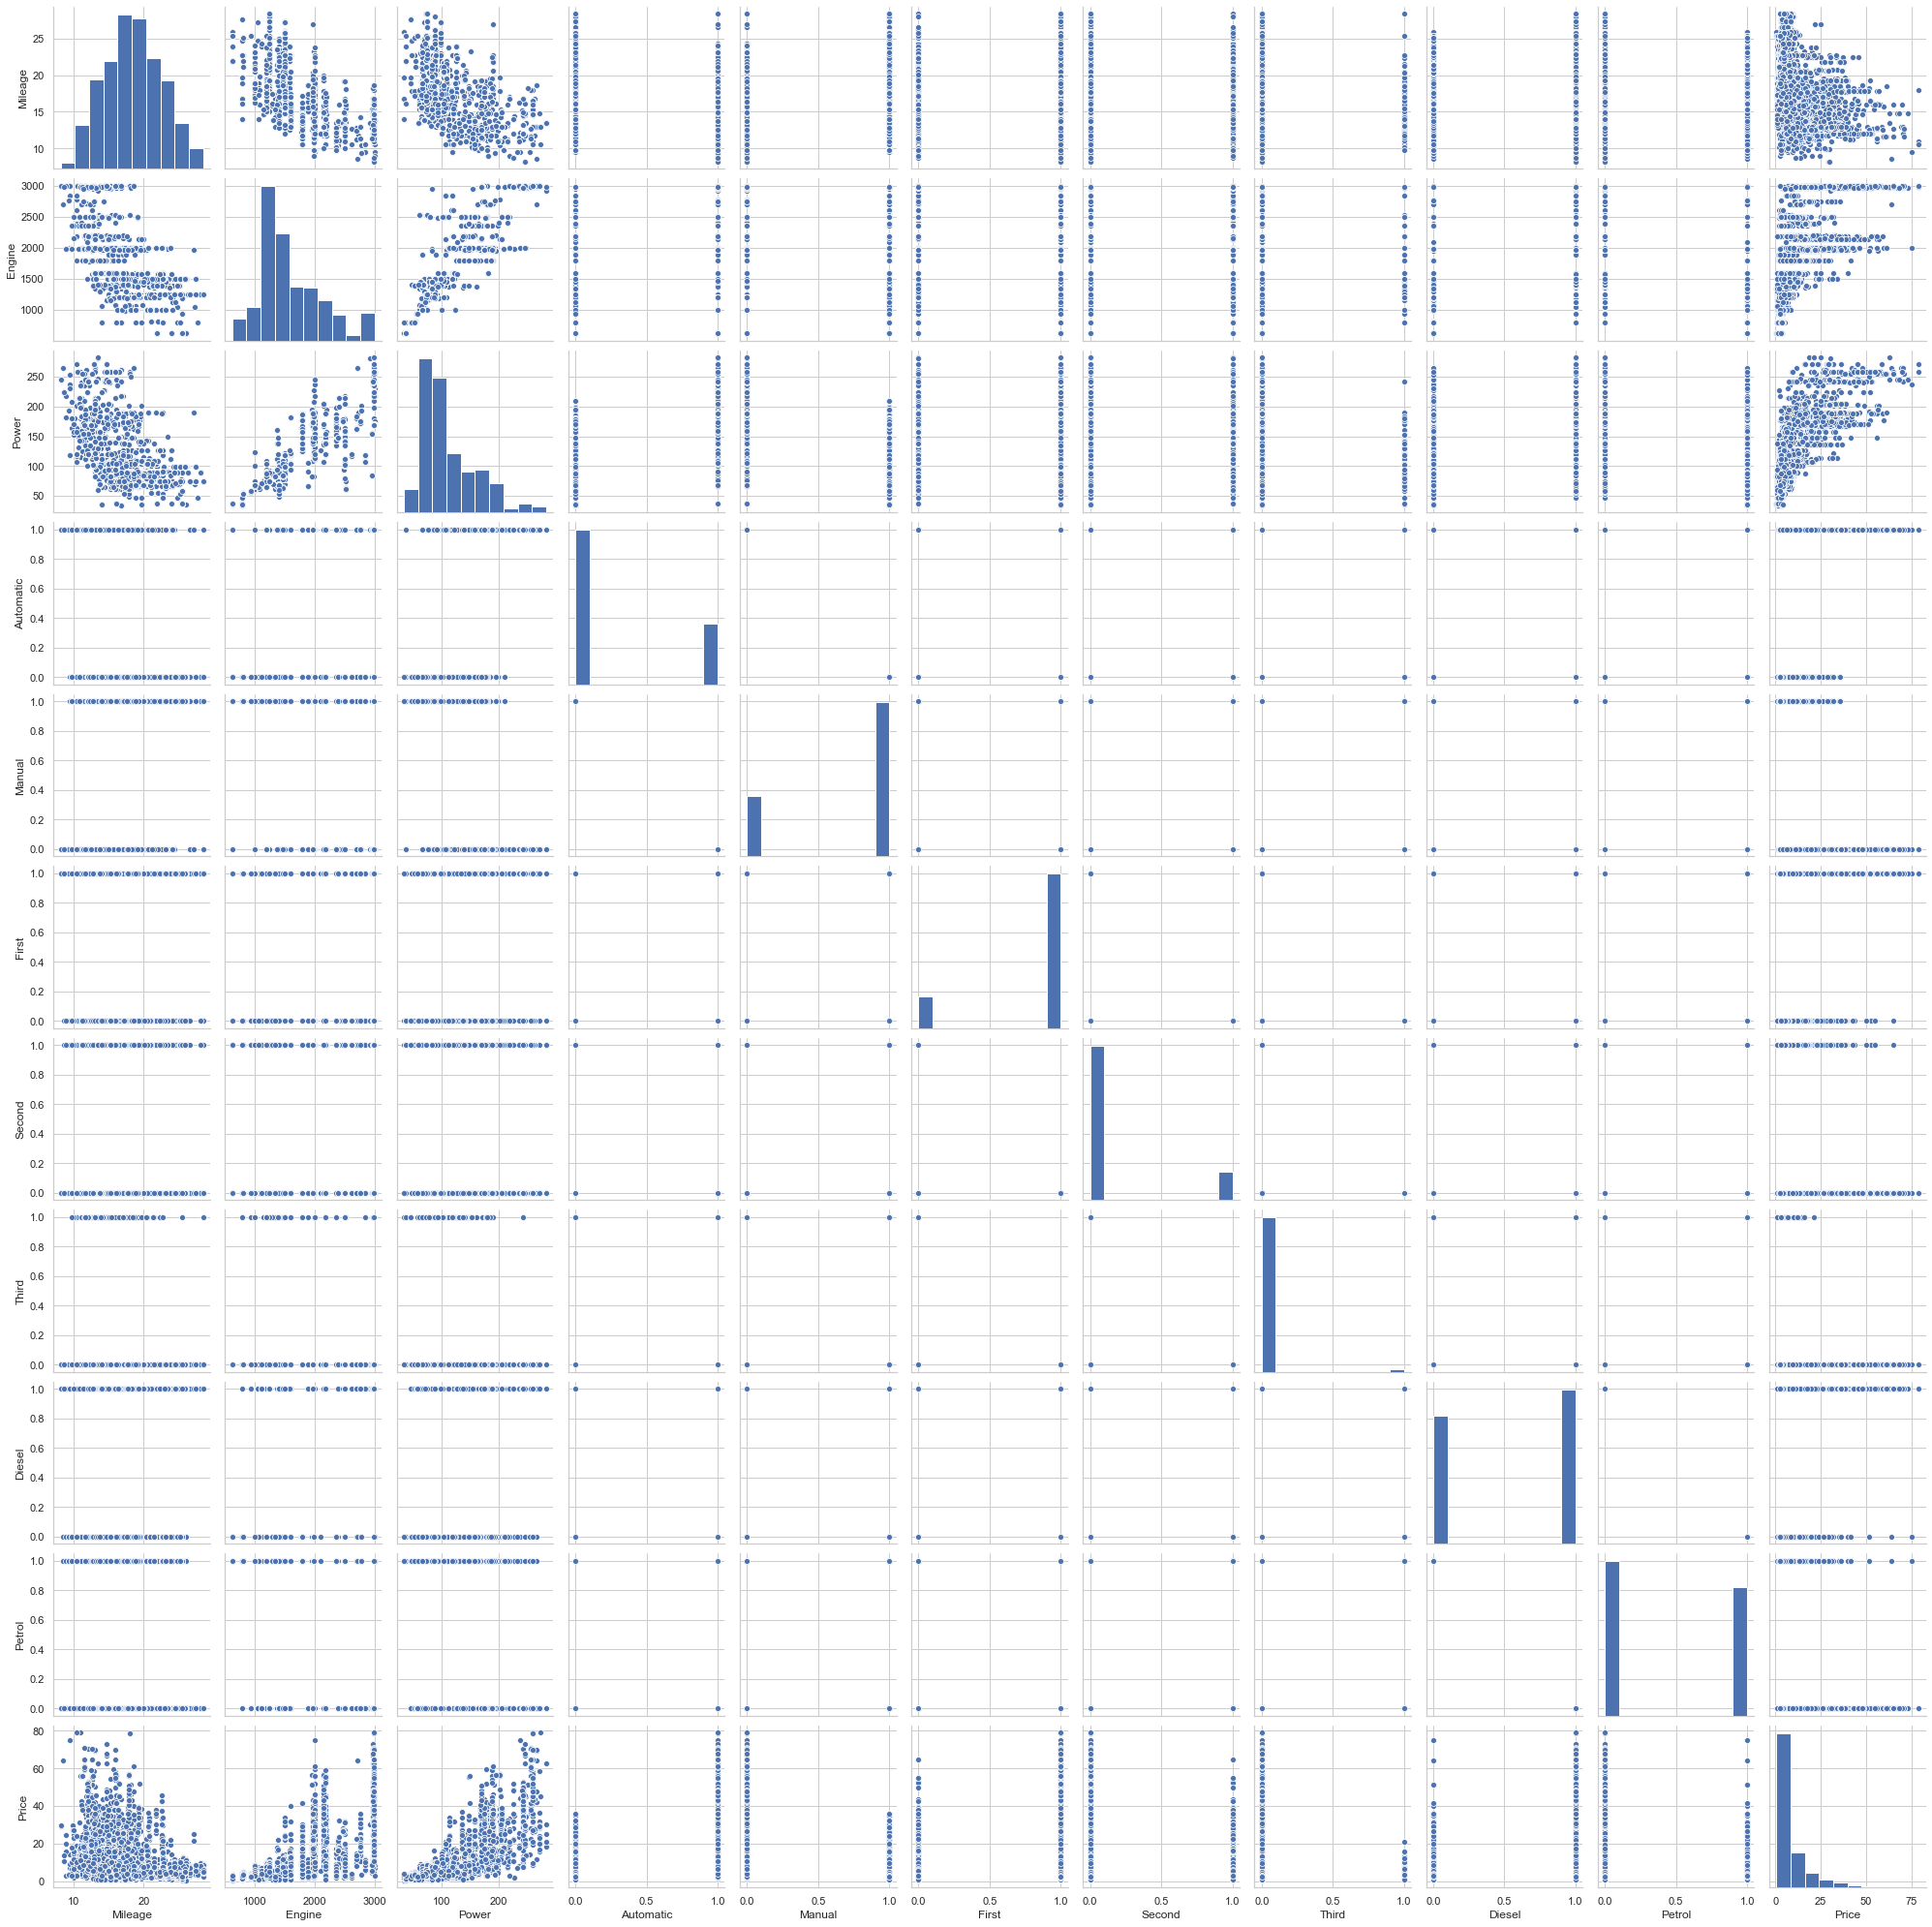

In [390]:
# Check the relationship for numerical data
sns.pairplot(df_test)  #pairplot
plt.show()

In [576]:
# Define X and y in the dataset for linear regression module
X = dataset1.drop(['Price', 'Brand','Car_Class', 'Seats', 'Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)
y = dataset1['Price']

In [577]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Automatic,Manual,First,Second,Third,Diesel,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,41000,19.67,1582,126.20,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,46000,18.20,1199,88.70,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,87000,20.77,1248,88.76,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,40670,15.20,1968,140.80,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6,86999,23.08,1461,63.10,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [578]:
y.head()

1    12.50
2     4.50
3     6.00
4    17.74
6     3.50
Name: Price, dtype: float64

In [579]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [580]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [581]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [582]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [583]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 13.032504026885107
MAE: 2.366134245890227
RMSE: 3.6100559589686565
r2_score: 0.75185683194152
